# Домашнее задание по теме "Временные ряды, общая теория"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1. Time Series_01: "Daily Total Female Births in Cal"

In [4]:
series_01 = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
series_01.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
series_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Count   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### 1.1 Анализ временного ряда

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


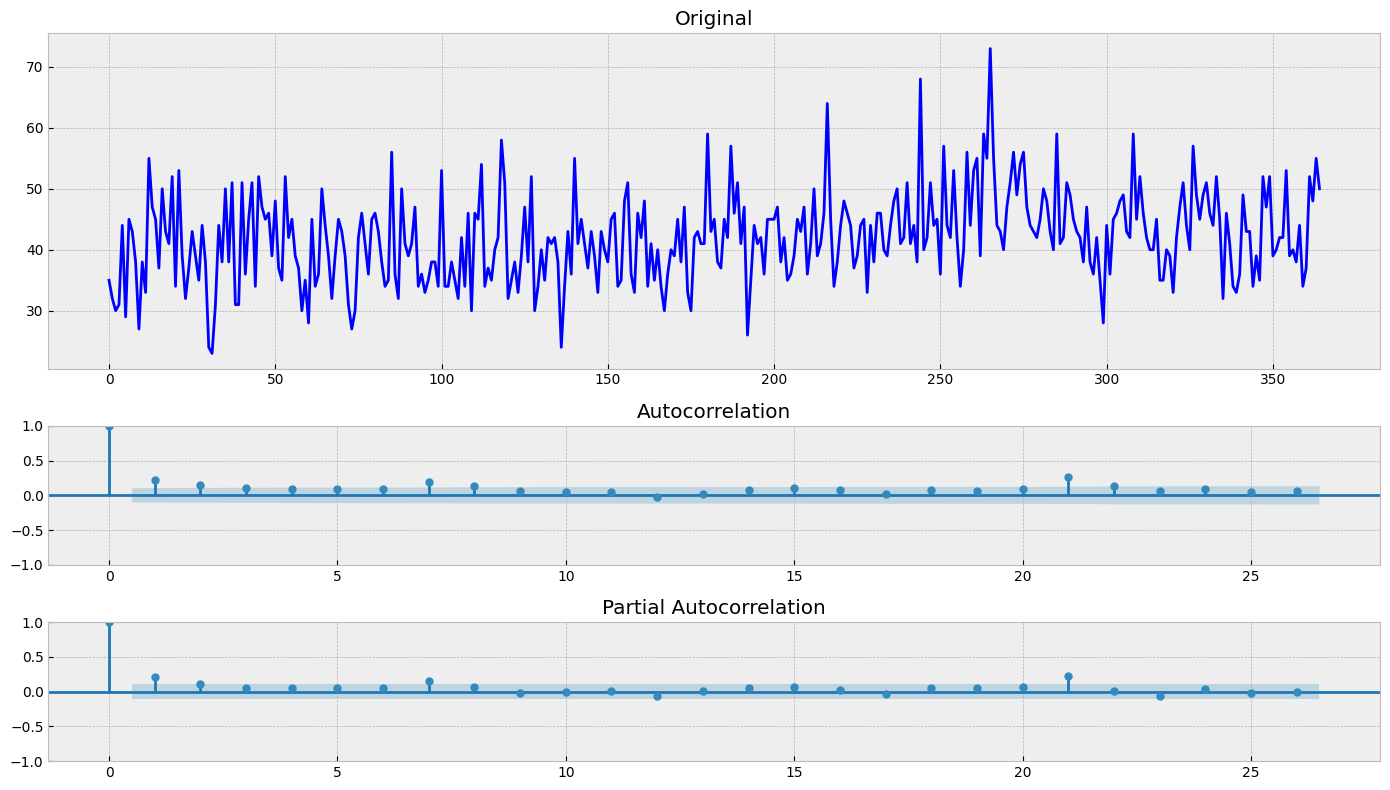

In [6]:
tsplot(series_01['Count'])

#### Вывод

Временной ряд "Daily Total Female Births in Cal" является стационарным по следующим признакам:
- Визуально похож на шум.
- Отсутсвует сезонность.
- На разных временных интервалах значения мат ожидания и дисперсии примерно одинаковы.
- Автокорреляция резко падает до значений, близких к 0)
- Все эти признака подтверждаются тестом Дики-Фуллера (p-value < 0.05)

In [7]:
series_02 = pd.read_csv("Series/international-airline-passengers.csv")
series_02.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## 2. Time Series_02 "International Airline Pessengers"

In [8]:
series_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
series_02 = series_02['Count']

### 2.1 Анализ временного ряда

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


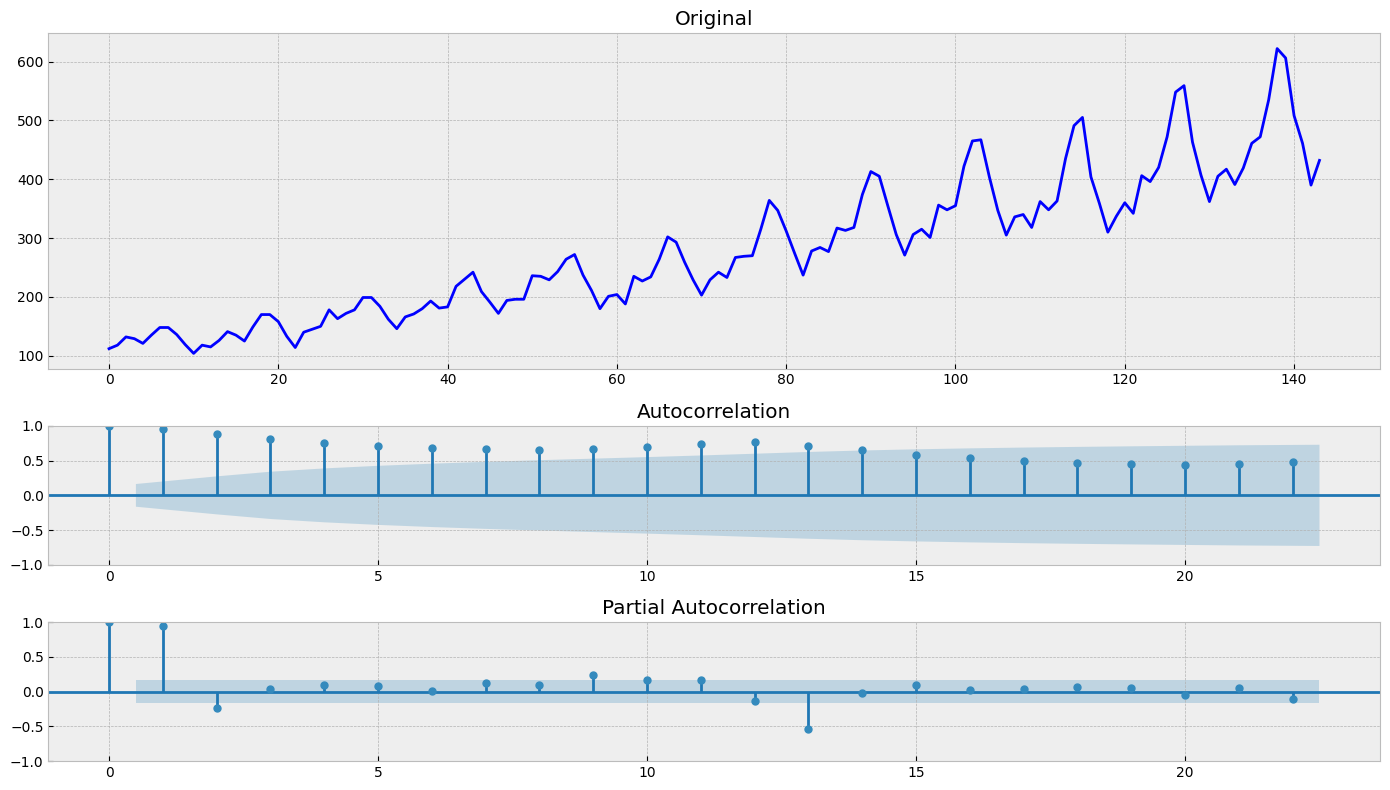

In [10]:
tsplot(series_02)

#### Вывод

Временной ряд "International Airline Pessengers" не является стационарным по следующим признакам:
- Визуально налицо сезонность и выраженый тренд.
- Также значения мат ожидания и дисперсии на разных временных отрезках разные.
- Постепенное плавное снижение значения аутокорреляции.
- Тест Дики_Фуллера (p-value > 0.05)

### 2.2 Преобразование временного ряда

План:
- выровнять дисперсии путем логарифмирования;
- избавиться от тренда путем дифференцирования с лагом = 1;
- избавиться от сезонности путем дифференцирования с лагом = сезонности.

#### Выравниваем дисперсии

In [11]:
series_02.shape

(144,)

In [12]:
series_02 = boxcox(series_02, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


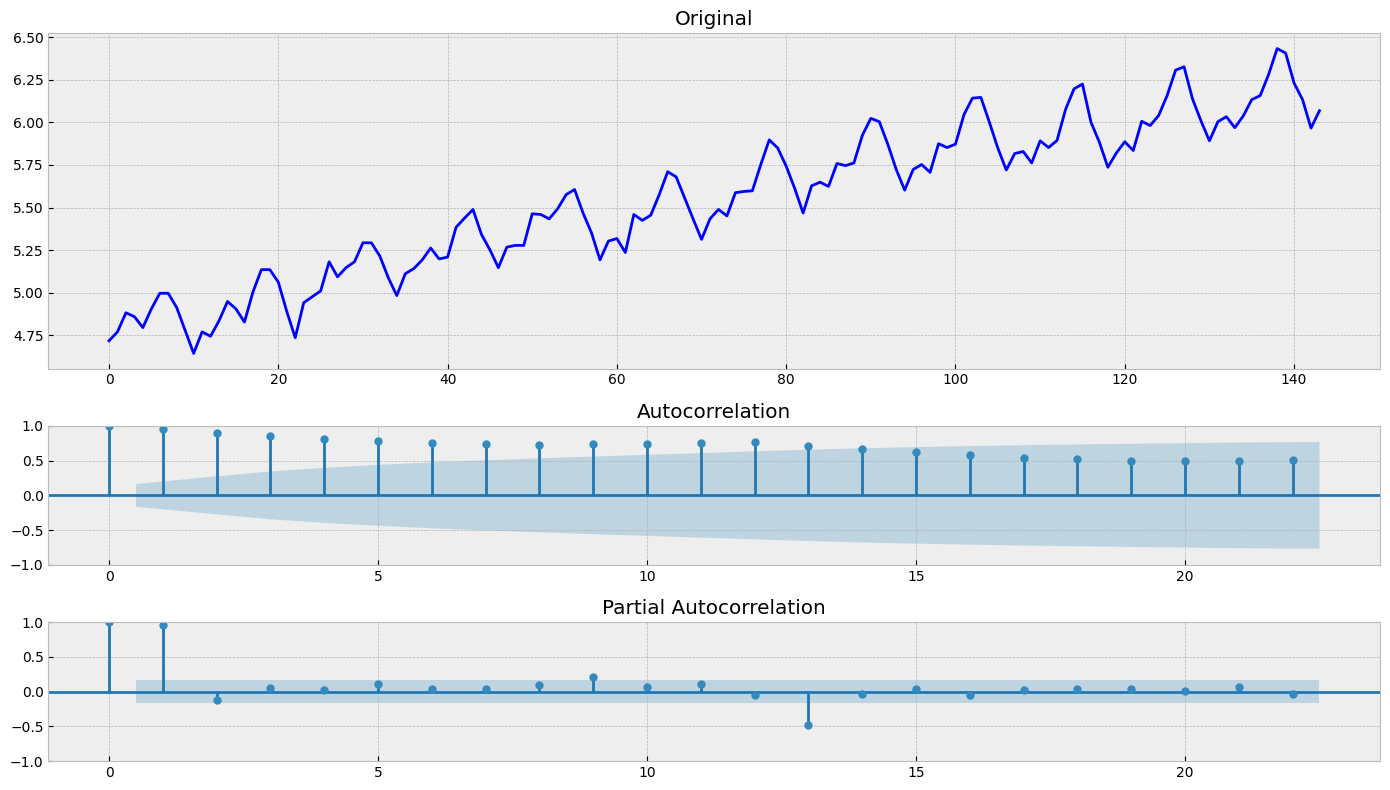

In [13]:
tsplot(series_02)

#### Избавляемся от тренда

In [14]:
series_02.shape

(144,)

In [15]:
series_02 = np.diff(series_02, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


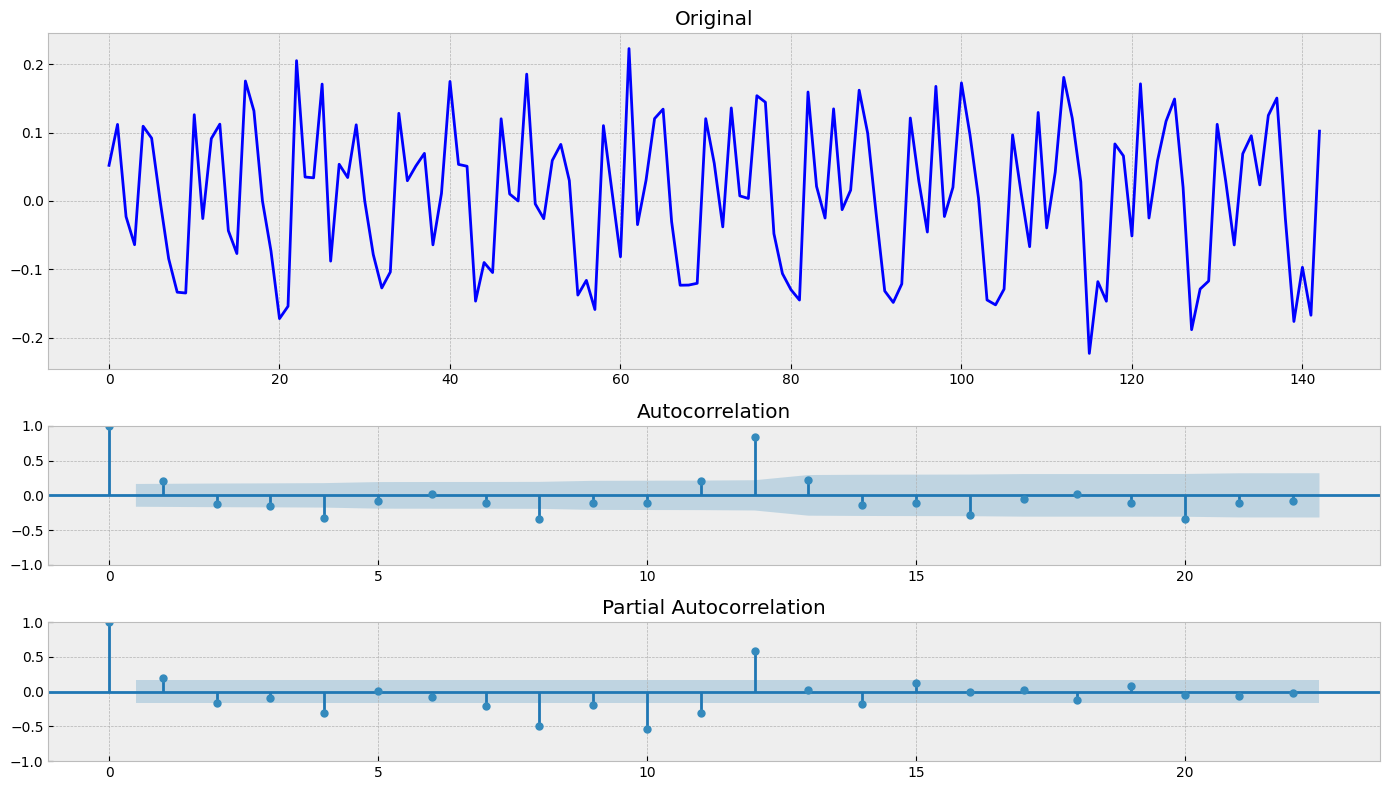

In [16]:
tsplot(series_02)

#### Избавляемс от сезонности

Судя по коррелограмме, сезонность равна 12. Проведем дифферцирование с лагом = 12

In [17]:
series_02 = series_02[12:] - series_02[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


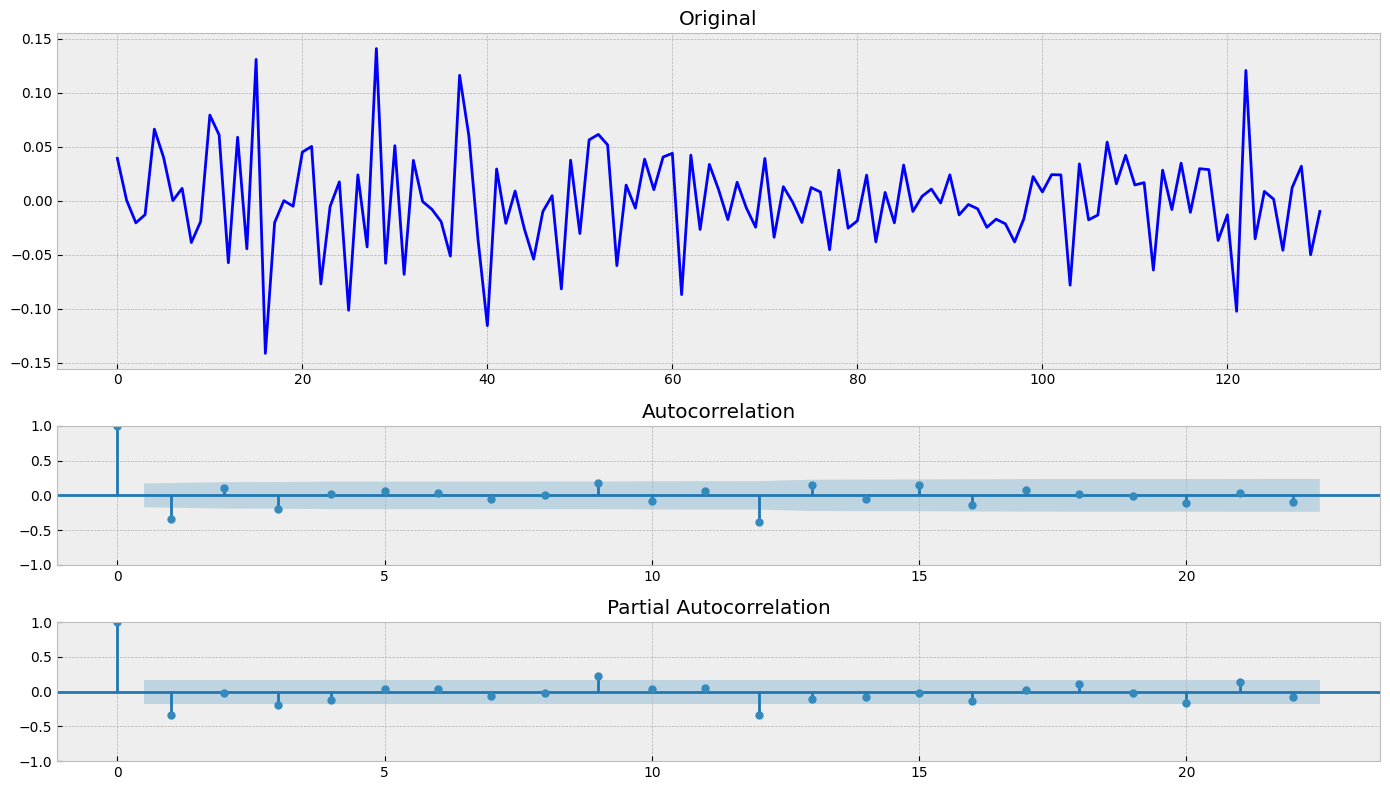

In [19]:
tsplot(series_02)

#### Вывод

Временной ряд преобразован в стационарный.

## 3. Time Series_03 "Mean Monthly Air Temperature Deg"

In [38]:
series_03 = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
series_03.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [39]:
series_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   240 non-null    object 
 1   Deg     240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


### 3.1 Анализ временного ряда

In [40]:
series_03 = series_03["Deg"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


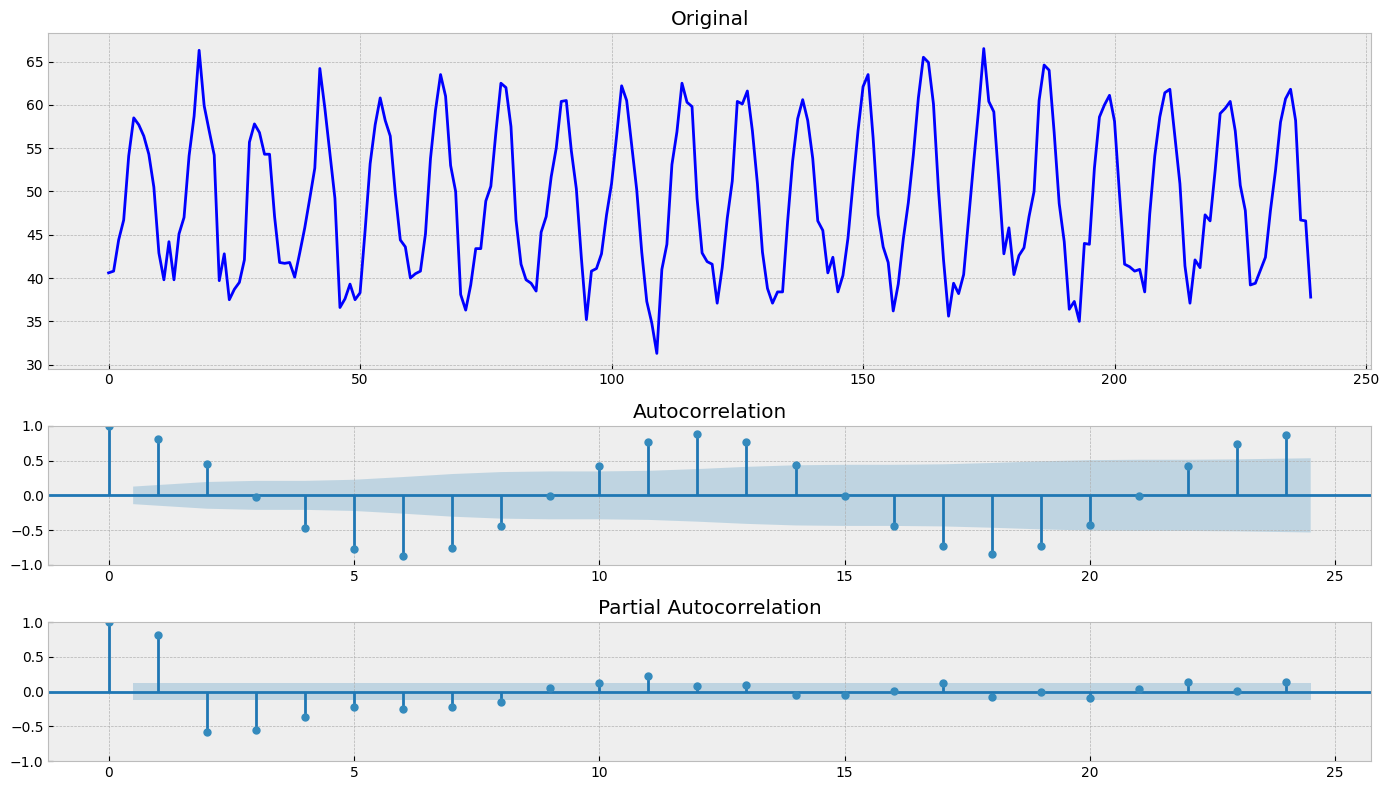

In [41]:
tsplot(series_03)

#### Вывод

- Учитывая то, что значение **p-value** < 0.05, это времиенной ряд можно считать стационарным.
- Но выраженная сезонность ряда немного нас настораживает.

### 3.2 Преобразование временного ряда

Для начала уберем изменения дисперсии:

In [42]:
series_03 = boxcox(series_03, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


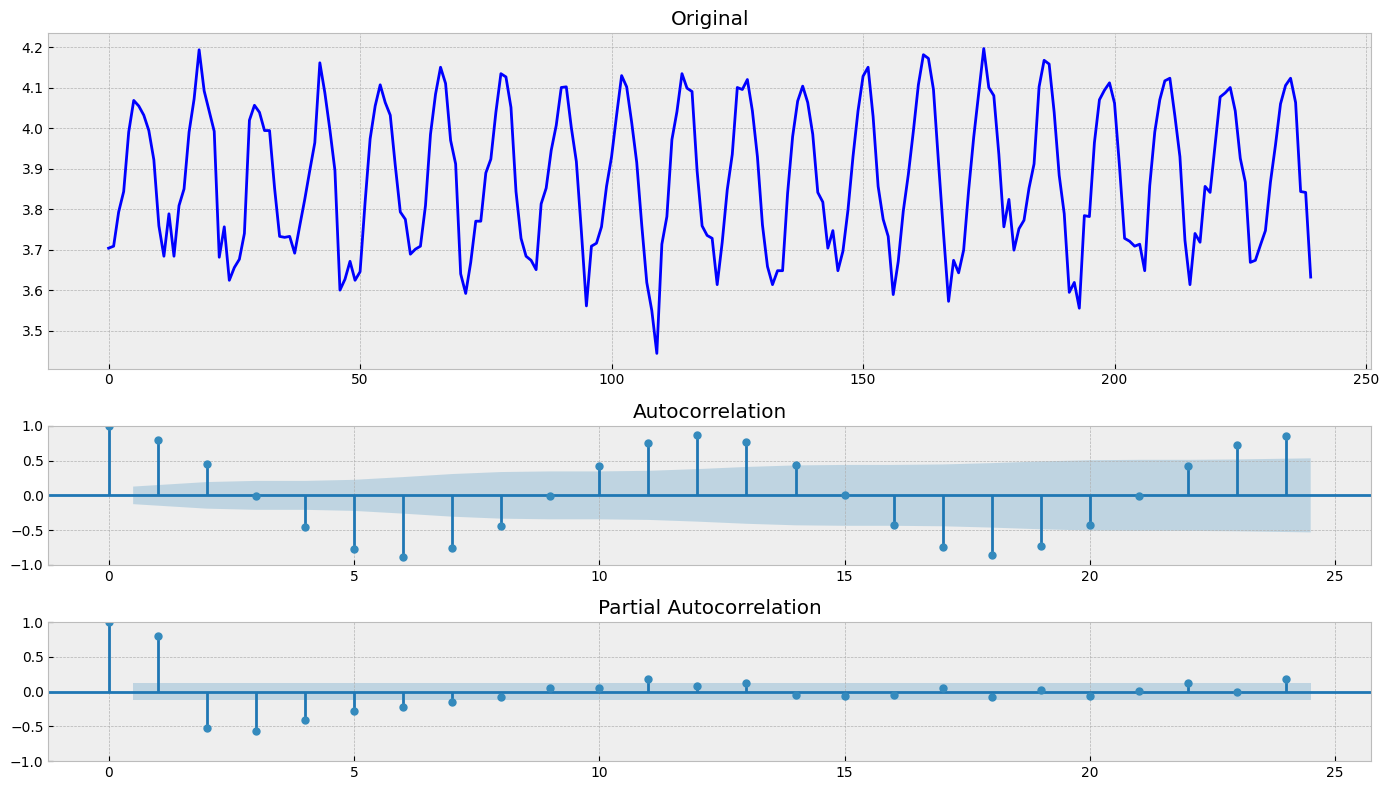

In [43]:
tsplot(series_03)

- Логарифмирование улучшило значение **p-value**.
- Однако сохраняется сезонность.
- Попробуем избавиться от сезонности, проведя дифференцирование со значение лага 12, и посмотрим на результат...

In [44]:
# series_03 = series_03.diff(periods=12)
# series_03 = np.array(series_03)
series_03 = series_03[12:] - series_03[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


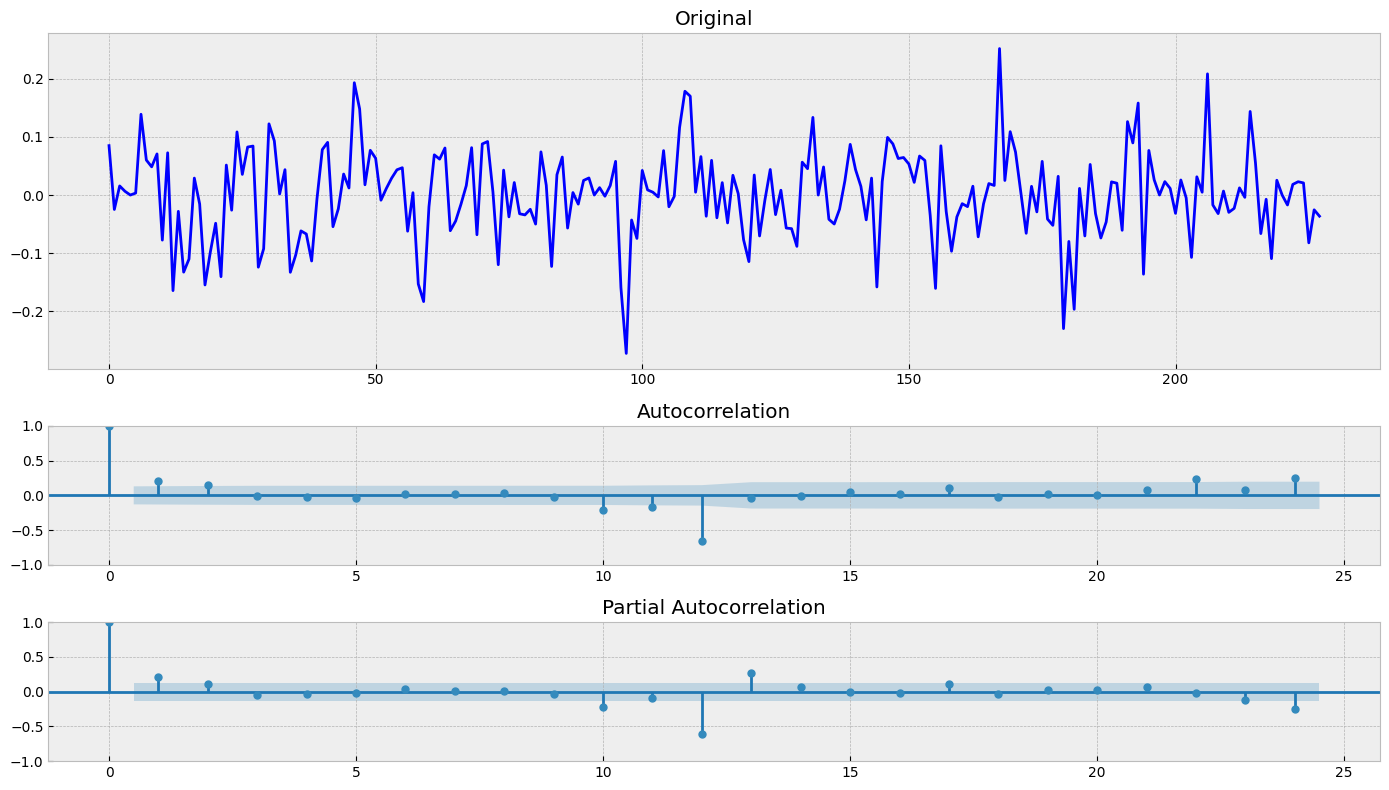

In [45]:
tsplot(series_03)

Попробуем еще раз продифференцировать ряд с лагом = 60

In [46]:
series_03 = series_03[60:] - series_03[:-60]

Results of Dickey-Fuller Test:
Test Statistic                  -3.599024
p-value                          0.005780
#Lags Used                      12.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


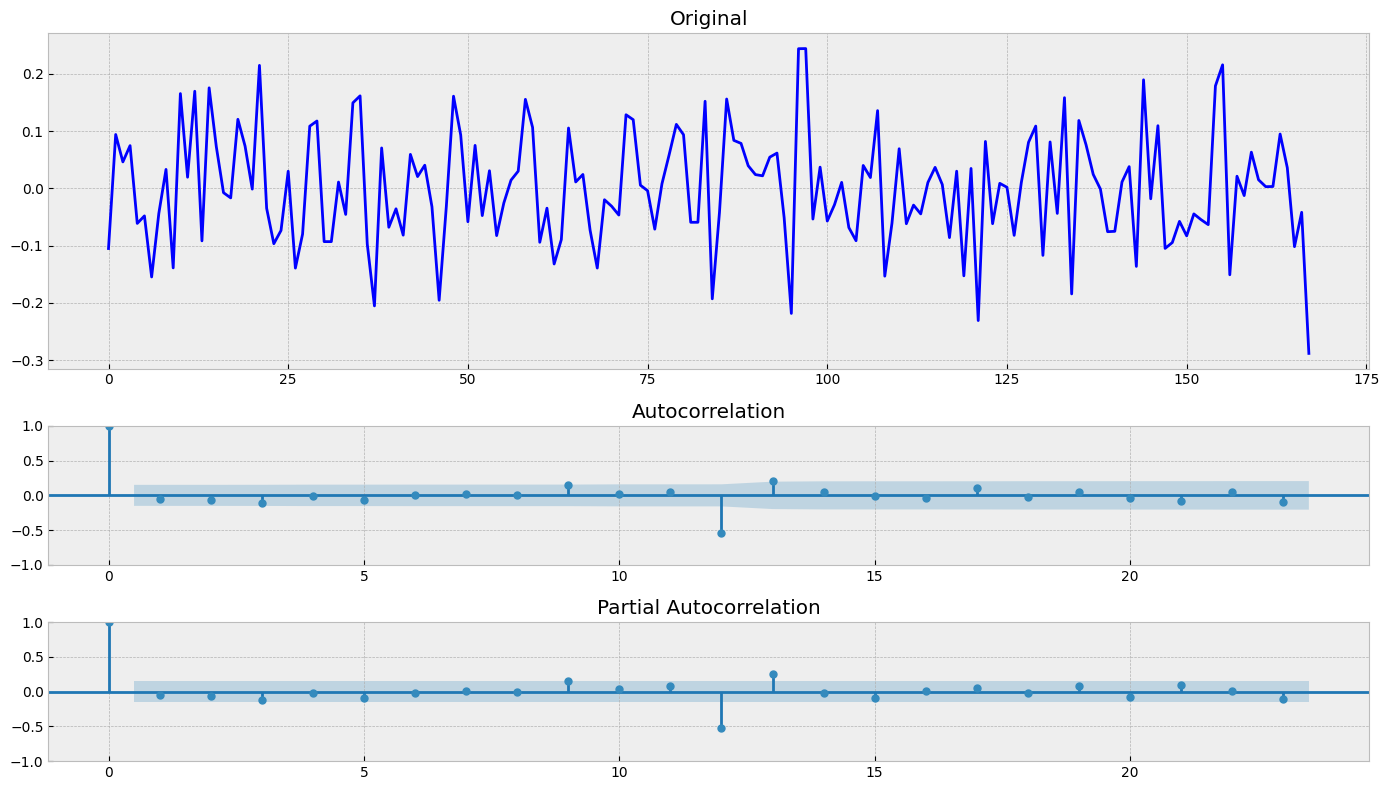

In [47]:
tsplot(series_03)

#### Вывод:

- Мы избавились от сезонности.
- Временной ряд стал больше похож на шум.
- При проведении теста Дики-Фуллера нам удалось лучшить значение **p-value** по сравнению с начальным.

## 4. Time Series_04 "Monthly Boston Armed Robberies J"

In [49]:
series_04 = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
series_04.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


### 4.1 Анализ временного ряда

In [50]:
series_04 = series_04['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


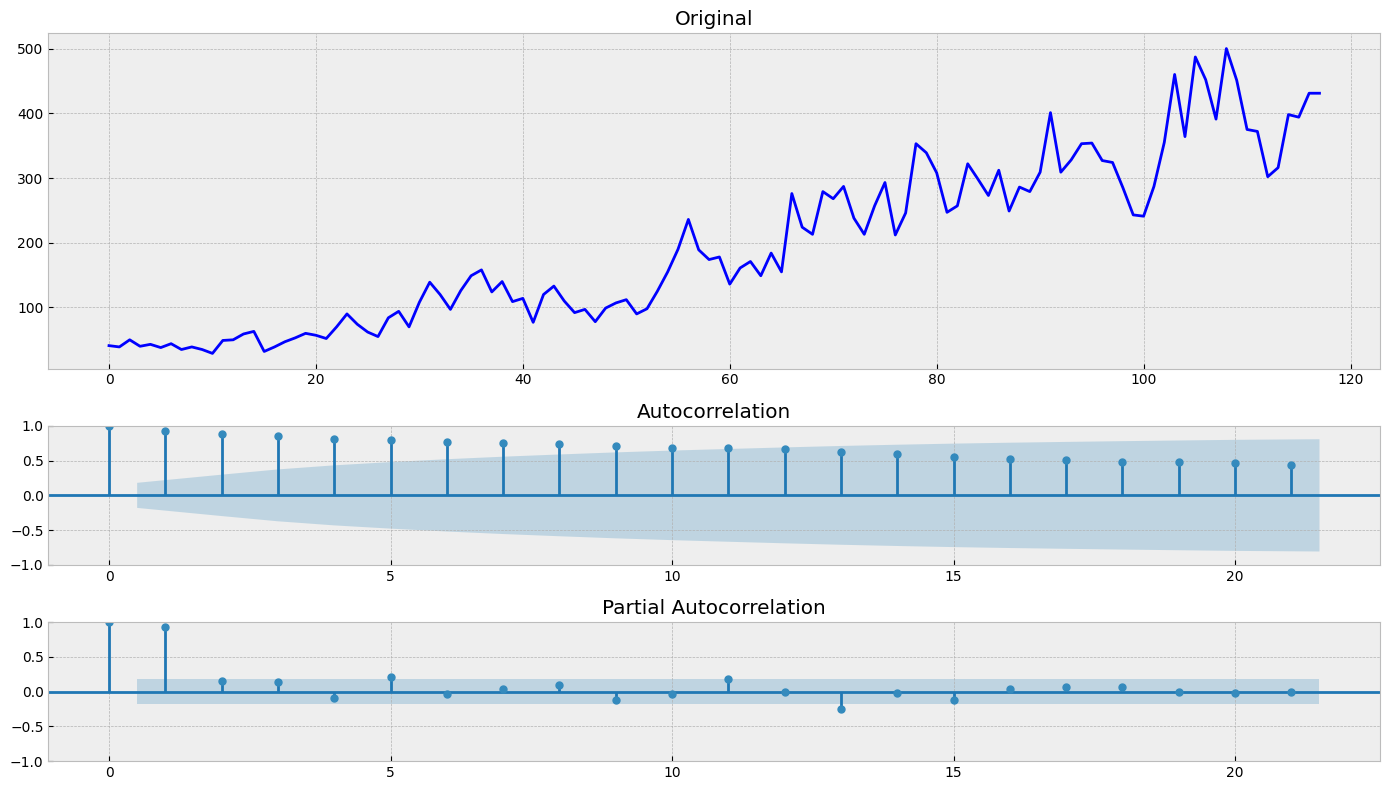

In [51]:
tsplot(series_04)

#### Вывод

Временной ряд "Monthly Boston Armed Robberies J" не является стационарным по следующим признакам:
- Визуально налицо сезонность и тренд.
- Также значения мат ожидания и дисперсии на разных временных отрезках разные.
- Постепенное плавное снижение значения аутокорреляции.
- Тест Дики_Фуллера (p-value > 0.05)

### 4.2 Преобразование временного ряда

План:
- выровнять дисперсии путем логарифмирования;
- избавиться от тренда путем дифференцирования с лагом = 1;
- избавиться от сезонности путем дифференцирования с лагом = сезонности.

#### Выравниваем дисперсии

In [52]:
series_04 = boxcox(series_04, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


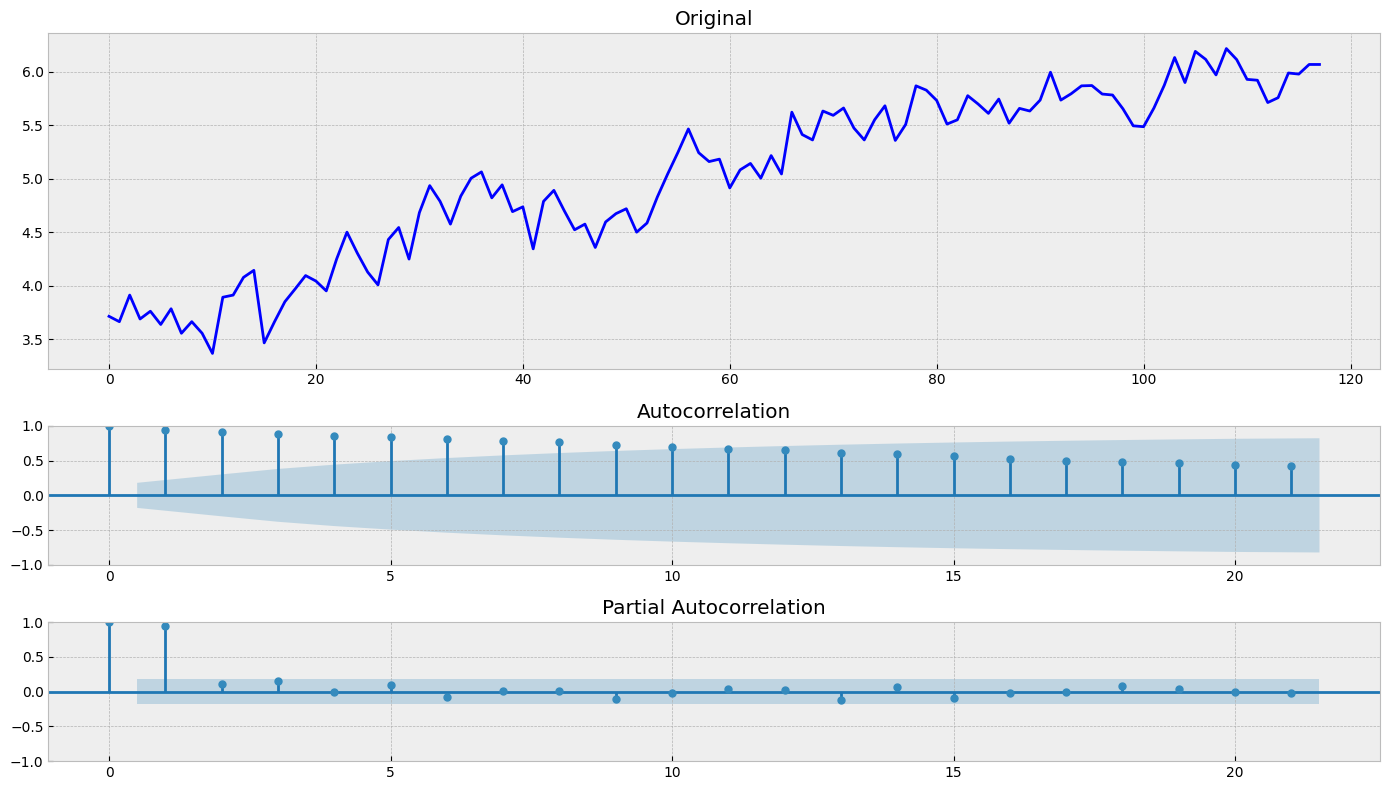

In [53]:
tsplot(series_04)

#### Избавляемся от тренда

In [54]:
series_04 = series_04[1:] - series_04[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


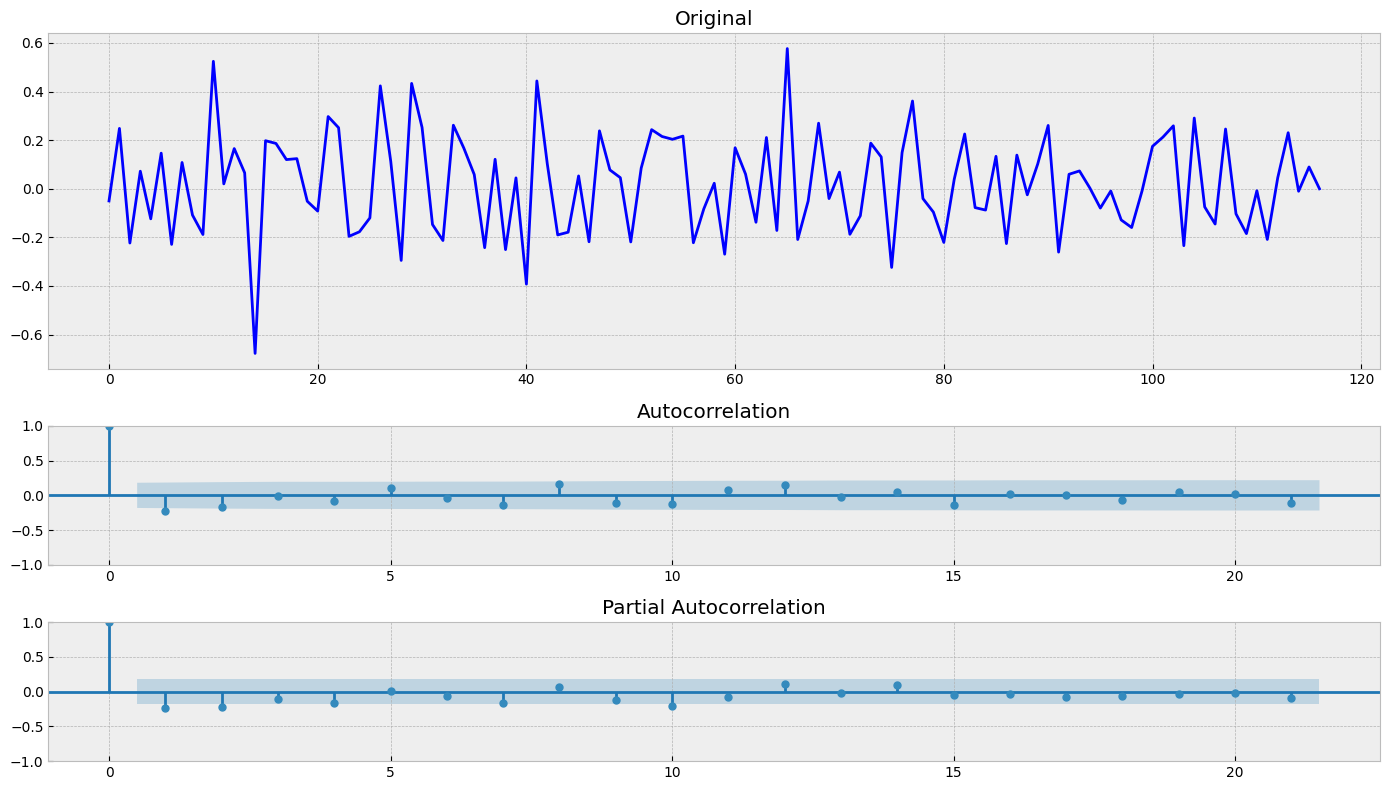

In [55]:
tsplot(series_04)

#### Избавляемся от сезонности:

Results of Dickey-Fuller Test:
Test Statistic                 -4.546815
p-value                         0.000162
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


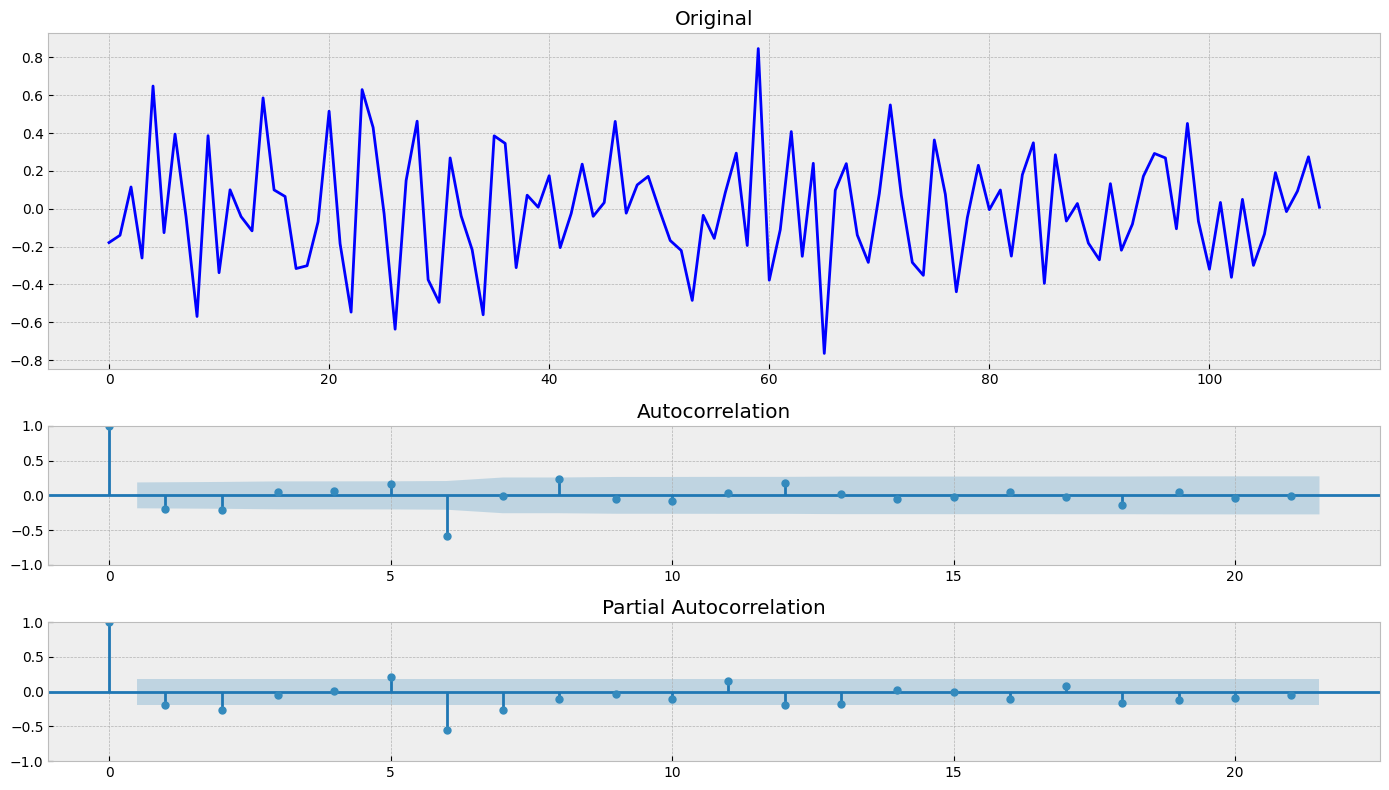

In [58]:
series_04 = series_04[6:] - series_04[:-6]
tsplot(series_04)

#### Вывод:

- Мы избавились от тренда, разности дисперсии и сезонности.
- Временной ряд стал больше похож на шум.
- При проведении теста Дики-Фуллера значение **p-value** < 0.05.

## 5. Time Series_05 "Monthly Sales of Company X Jan-6"

In [104]:
series_05 = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
series_05.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


### 5.1 Анализ временного ряда

In [105]:
series_05 = series_05['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


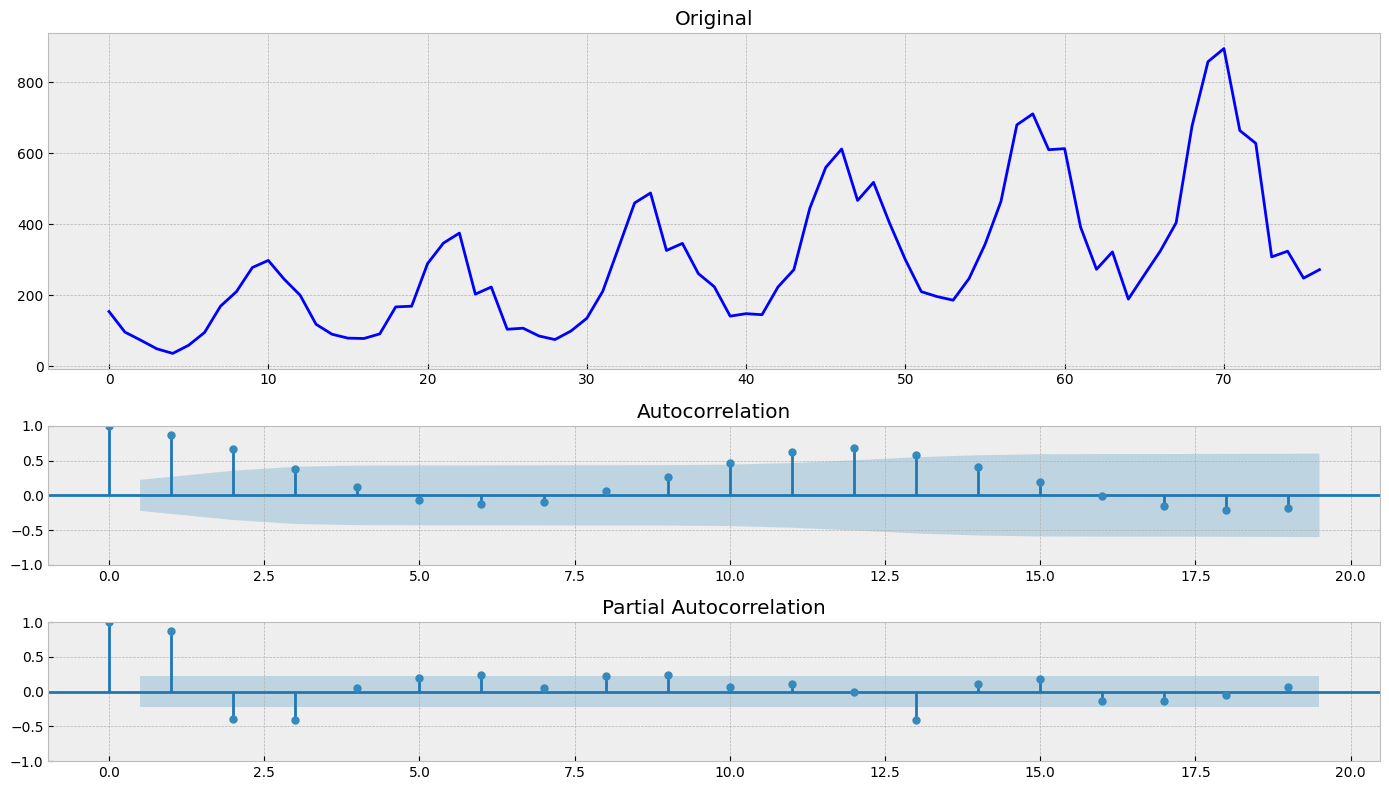

In [106]:
tsplot(series_05)

#### Вывод

Временной ряд "Monthly Sales of Company X Jan-6" не является стационарным по следующим признакам:
- Визуально налицо сезонность и тренд.
- Также значения мат ожидания и дисперсии на разных временных отрезках разные.
- Постепенное плавное изменение значений автокорреляции.
- Тест Дики_Фуллера (p-value > 0.05)

### 5.2 Преобразование временного рада

#### Выравниваем дисперсии

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


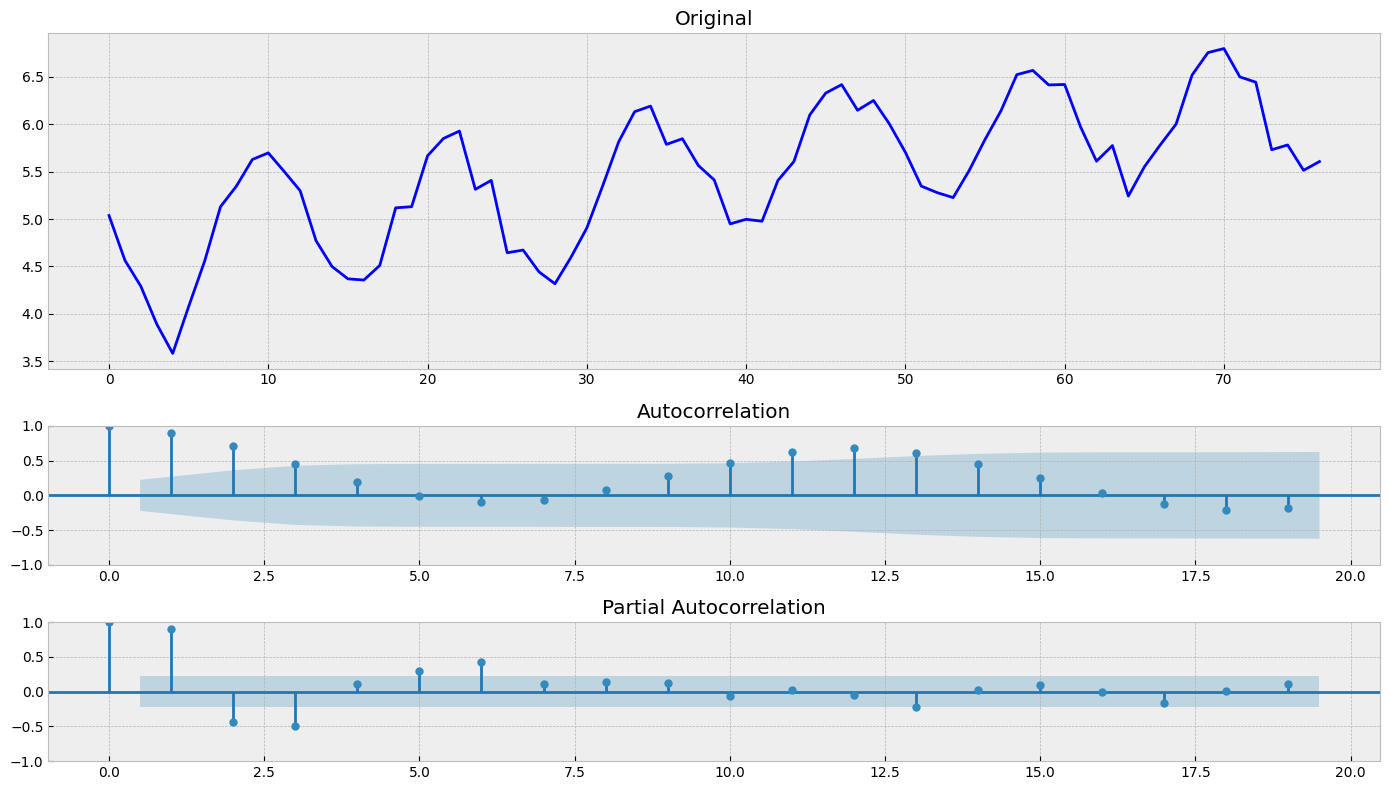

In [107]:
series_05 = boxcox(series_05, 0)
tsplot(series_05)

#### Избавляемся от тренда

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


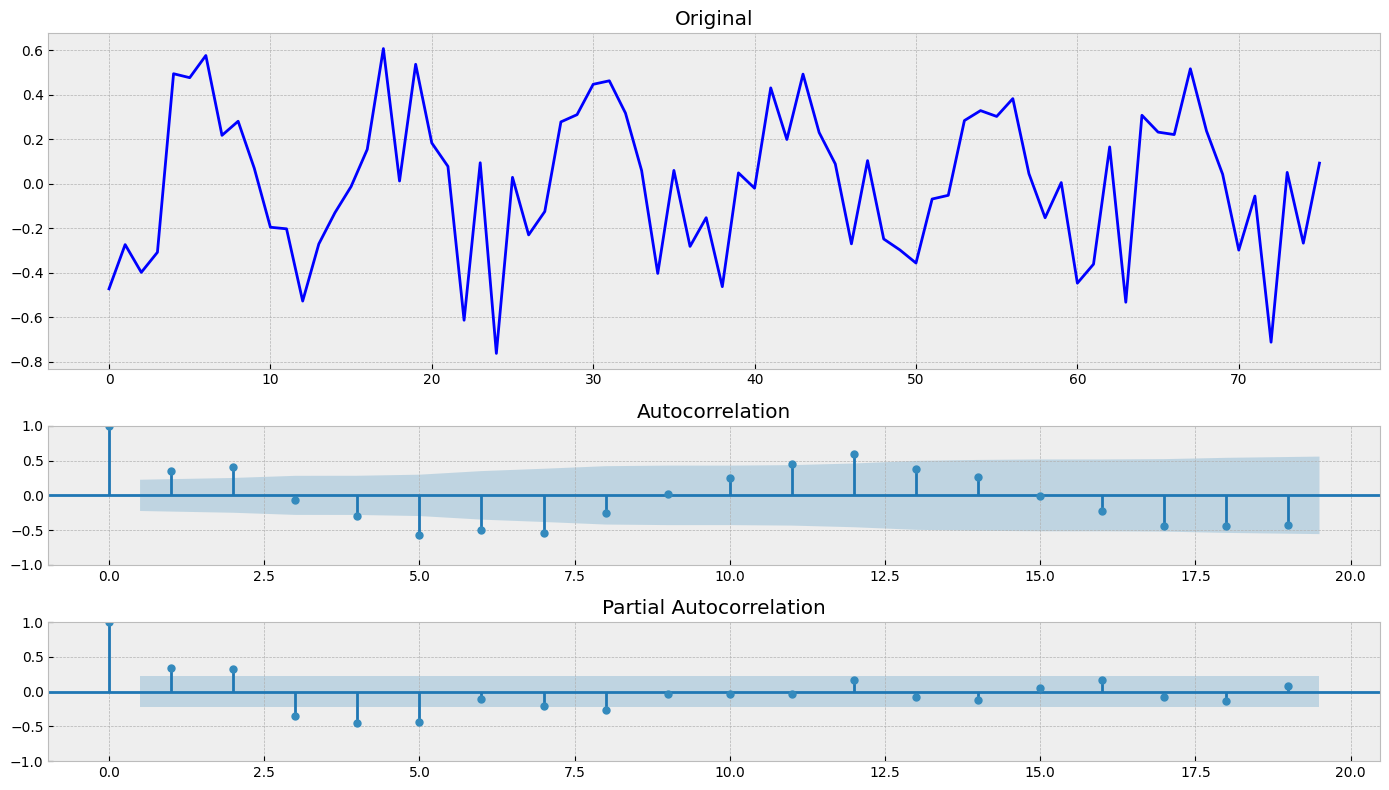

In [108]:
series_05 = series_05[1:] - series_05[:-1]
tsplot(series_05)

#### Избавляемся от сезонности

Продифференцируем с лагом = 30:

Results of Dickey-Fuller Test:
Test Statistic                 -5.494357
p-value                         0.000002
#Lags Used                      8.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


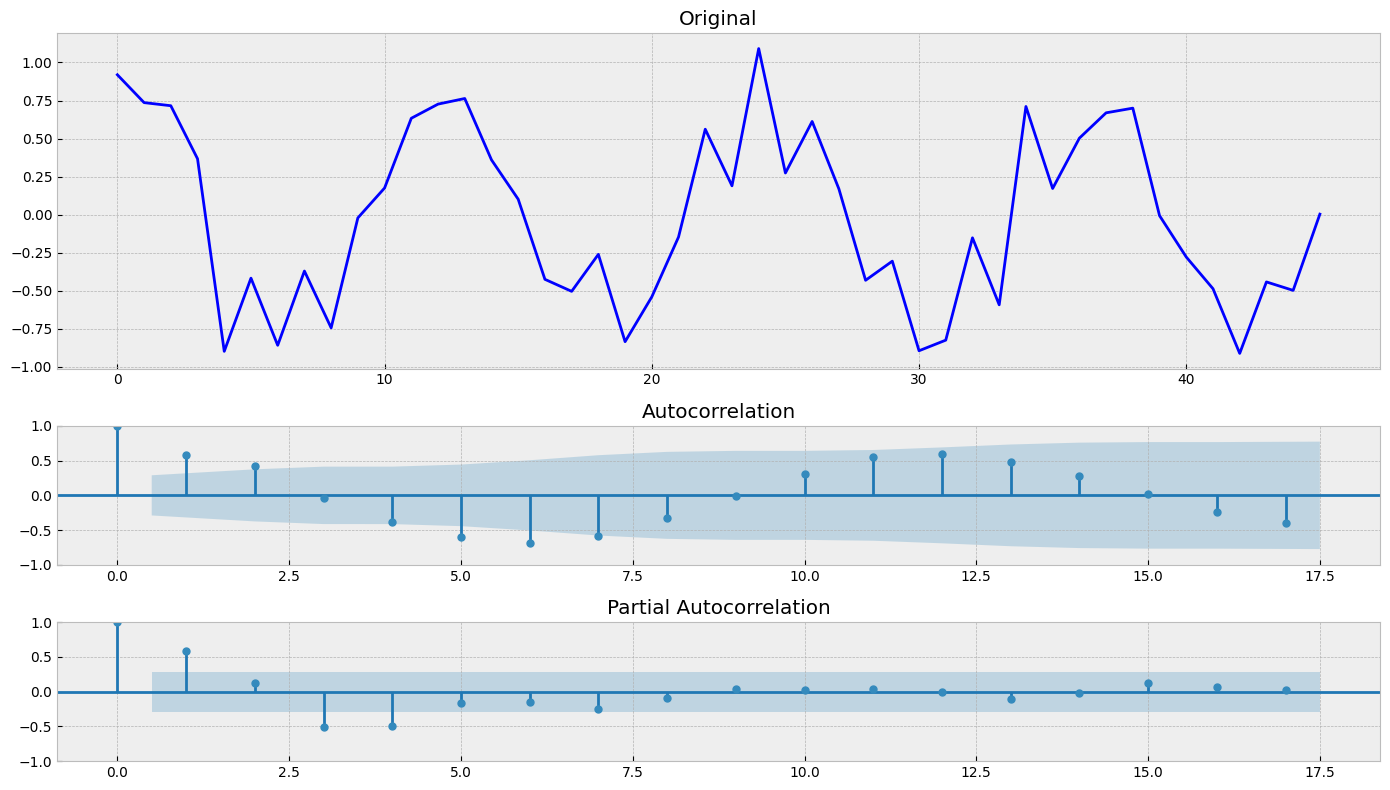

In [109]:
series_05 = series_05[30:] - series_05[:-30]
tsplot(series_05)

#### Вывод:

- По результатам теста Дики-Фулера временной ряд является стационарным
- Хотя визуально можно заметить некое подобие сезонности...


## 6. Time Series_06 "Weekly Closings of the Dowjones"

In [126]:
series_06 = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
series_06.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [127]:
series_06 = series_06["Close"]

### 6.1 Анализ временного ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


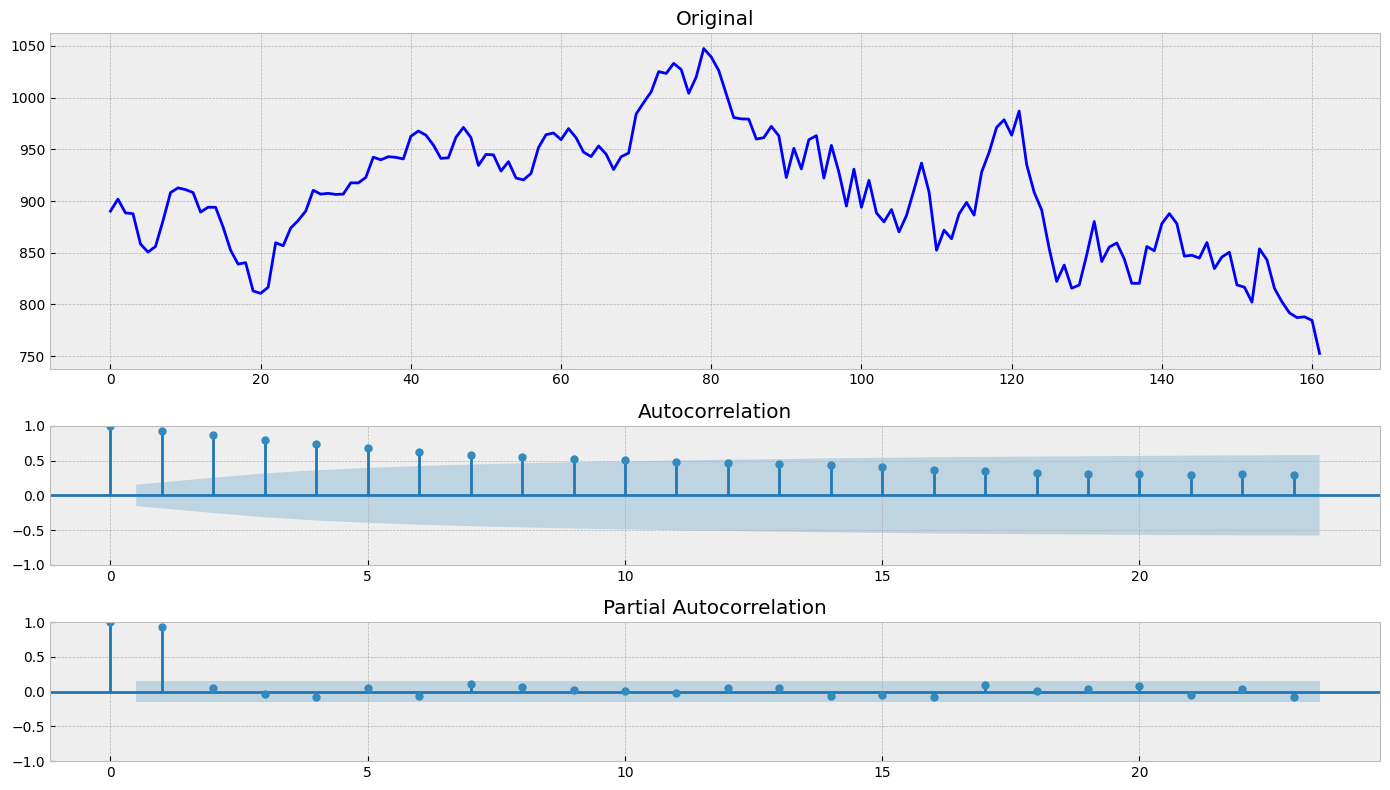

In [128]:
tsplot(series_06)

#### Вывод

Временной ряд "Weekly Closings of the Dowjones" не является стационарным по следующим признакам:
- Визуально отмечается тренд.
- Также значения мат ожидания и дисперсии на разных временных отрезках разные.
- Постепенное плавное изменение значений автокорреляции.
- Тест Дики_Фуллера (p-value > 0.05)

### 6.1 Преобразование временного ряда

#### Избавляемся от тренда

In [129]:
series_06 = np.array(series_06)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


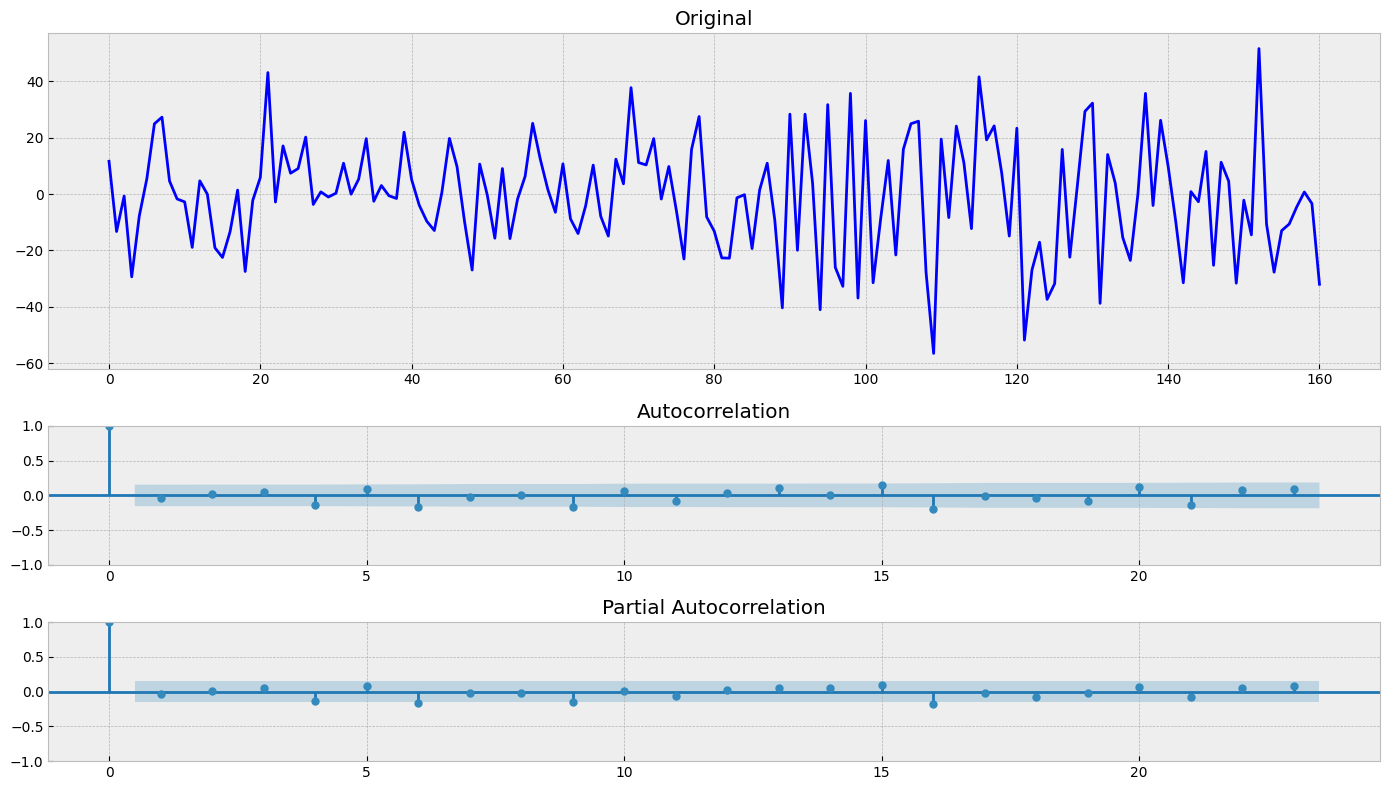

In [130]:
series_06 = series_06[1:] - series_06[:-1]
tsplot(series_06)

#### Вывод:

Временной ряд вреобразован в стационарный.